# Mapeando el Universo





```
# Tiene formato de código
```

## Introducción

 En este primer trabajo comenzaremos a explorar los datos, para ello se propone responder las siguientes consignas:
 
**1 - Análisis general**
 
 * Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 
**2 - Análisis estadístico**
 
 * Es la distribución de galaxia uniforme sobre la bóveda celeste?
 * Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.
 * Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?
 * Cuál es la distribución del corrimiento al rojo de las galaxias?
 * Existe correlación entre las diferentes variables?
 * Realicen gráficos boxplot para identificar outliers.
 * Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?
 * Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.
 * Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

Link de informacion de campo: 
https://astronomy.stackexchange.com/questions/18986/what-is-the-ugriz-magnitude-system

### Lectura de datos

Esto es una manera, pueden utilizar las que más les convenga

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
filename = "http://iate.oac.uncor.edu/~marioagustin/files/DiploDatos.csv" 
#Dirección obtenida de link del mail, data completo. 

In [ ]:
df = pd.read_csv(filename,index_col=0)

In [ ]:
df.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,modelMagErr_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,petroMagErr_u,petroMagErr_g,petroMagErr_r,petroMagErr_i,petroMagErr_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroRadErr_u,petroRadErr_g,petroRadErr_r,petroRadErr_i,petroRadErr_z,petroR50_u,...,deVABErr_u,deVABErr_g,deVABErr_r,deVABErr_i,deVABErr_z,deVPhi_u,deVPhi_g,deVPhi_r,deVPhi_i,deVPhi_z,expRad_u,expRad_g,expRad_r,expRad_i,expRad_z,expRadErr_u,expRadErr_g,expRadErr_r,expRadErr_i,expRadErr_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,expABErr_u,expABErr_g,expABErr_r,expABErr_i,expABErr_z,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
count,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,8.640640e+05,8.640640e+05,8.640640e+05,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,...,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000
mean,0.146665,0.006212,0.506687,152.105125,19.082283,180.984622,23.169815,0.019396,0.019141,19.357238,17.630979,16.839561,16.340103,15.968796,-0.564927,-0.720916,-0.555353,-0.612258,-0.666727,19.320424,17.688511,16.905999,16.442192,16.152461,3.780892,4.070594e+02,1.172808e+03,2.951576e+02,-0.465020,10.571112,5.772570,5.585574,5.506951,5.776584,-269.838432,-53.529862,-10.912816,-4.066590,-8.977702,-360.683766,...,2.293391,-0.064356,-0.042829,-0.127182,0.188682,88.938275,87.264172,89.689082,89.489560,88.728485,3.986354,1.800348,1.758921,1.578380,1.309367,2.630311,-0.585365,-0.480114,-0.526736,-0.478658,-0.275833,-0.097709,0.089991,0.033010,-0.044679,2.934627,0.030732,-0.025438,-0.163370,0.318155,88.824944,87.177767,89.704905,89.506825,88.710756,0.148097,0.115396,0.079831,0.059323,0.044125
std,0.112969,0.983079,7.928166,99.785205,21.410615,68.994142,19.353401,0.100562,0.101299,87.577074,86.219669,75.434829,79.185061,83.464775,87.388253,86.051642,75.295770,79.043962,83.319559,87.579886,86.220995,75.435203,78.449548,81.353727,1135.873091,2.754148e+05,4.005720e+05,2.131671e+05,82.409232,18.943250,5.312938,4.179531,4.707537,5.662786,452.784527,240.355857,127.638001,100.119310,125.560744,1872.515594,...,116.437168,93.855507,88.610620,125.606493,172.554799,105.284457,103.487251,94.367483,97.192319,100.292847,87.847360,86.105212,75.341630,79.087893,83.357661,89.188365,86.154787,75.362028,79.345710,83.539295,87.390121,86.057154,75.300821,79.049145,83.324735,114.417584,101.453598,104.070879,123.660794,172.431142,105.268848,103.415387,94.336062,97.135783,100.143786,0.175970,0.137115,0.094855,0.070488,0.052430
min,-0.011088,-6.000000,0.000000,0.000000,-7.000000,0.000672,-11.252825,0.000438,0.000341,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9999.000000,0.000160,0.000442,0.035852,0.000104,0.00

### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente ha votado si se corresponde con una galaxia espiral, elíptica o irregular.

In [ ]:
filename = '/content/DiploDatos_Zoo.csv' #Subirlo temporalmente

In [ ]:
zoo = pd.read_csv(filename,index_col=0)

In [ ]:
zoo.describe() #Visualizamos el 2do dataset para ver su contenido

,spiral,elliptical,uncertain
count,621957.000000,621957.000000,621957.000000
mean,0.286160,0.093688,0.620152
std,0.451965,0.291395,0.485349
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [ ]:
zoo.dtypes

In [ ]:
dd = df.join(zoo) #Total de 117 columnas uniendo todo

In [ ]:
#filling Nan's with 0's in galaxy type variable (esto sugirió el profe) (lo puse acá porque no están en el nuevo_data)
for col in ['spiral','elliptical','uncertain']:
    dd[col] = dd[col].fillna(0)
    #check 
    print(dd[col].isna().sum())

In [ ]:
dd.dtypes # debemos volver a transformar las variables del conjunto set en variables categóricas 
          # (esto me pasaba en mi notebook, así que los tuve que volver a transformar)

In [ ]:
for col in ['spiral','elliptical','uncertain']:
    dd[col] = dd[col].apply(np.int64)
    #check 
    print(dd[col].dtypes)

In [ ]:
dd.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,modelMagErr_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,petroMagErr_u,petroMagErr_g,petroMagErr_r,petroMagErr_i,petroMagErr_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroRadErr_u,petroRadErr_g,petroRadErr_r,petroRadErr_i,petroRadErr_z,petroR50_u,...,deVABErr_i,deVABErr_z,deVPhi_u,deVPhi_g,deVPhi_r,deVPhi_i,deVPhi_z,expRad_u,expRad_g,expRad_r,expRad_i,expRad_z,expRadErr_u,expRadErr_g,expRadErr_r,expRadErr_i,expRadErr_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,expABErr_u,expABErr_g,expABErr_r,expABErr_i,expABErr_z,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
count,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,8.640640e+05,8.640640e+05,8.640640e+05,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,...,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,864064.000000,621957.000000,621957.000000,621957.000000
mean,0.146665,0.006212,0.506687,152.105125,19.082283,180.984622,23.169815,0.019396,0.019141,19.357238,17.630979,16.839561,16.340103,15.968796,-0.564927,-0.720916,-0.555353,-0.612258,-0.666727,19.320424,17.688511,16.905999,16.442192,16.152461,3.780892,4.070594e+02,1.172808e+03,2.951576e+02,-0.465020,10.571112,5.772570,5.585574,5.506951,5.776584,-269.838432,-53.529862,-10.912816,-4.066590,-8.977702,-360.683766,...,-0.127182,0.188682,88.938275,87.264172,89.689082,89.489560,88.728485,3.986354,1.800348,1.758921,1.578380,1.309367,2.630311,-0.585365,-0.480114,-0.526736,-0.478658,-0.275833,-0.097709,0.089991,0.033010,-0.044679,2.934627,0.030732,-0.025438,-0.163370,0.318155,88.824944,87.177767,89.704905,89.506825,88.710756,0.148097,0.115396,0.079831,0.059323,0.044125,0.286160,0.093688,0.620152
std,0.112969,0.983079,7.928166,99.785205,21.410615,68.994142,19.353401,0.100562,0.101299,87.577074,86.219669,75.434829,79.185061,83.464775,87.388253,86.051642,75.295770,79.043962,83.319559,87.579886,86.220995,75.435203,78.449548,81.353727,1135.873091,2.754148e+05,4.005720e+05,2.131671e+05,82.409232,18.943250,5.312938,4.179531,4.707537,5.662786,452.784527,240.355857,127.638001,100.119310,125.560744,1872.515594,...,125.606493,172.554799,105.284457,103.487251,94.367483,97.192319,100.292847,87.847360,86.105212,75.341630,79.087893,83.357661,89.188365,86.154787,75.362028,79.345710,83.539295,87.390121,86.057154,75.300821,79.049145,83.324735,114.417584,101.453598,104.070879,123.660794,172.431142,105.268848,103.415387,94.336062,97.135783,100.143786,0.175970,0.137115,0.094855,0.070488,0.052430,0.451965,0.291395,0.485349
min,-0.011088,-6.000000,0.000000,0.000000,-7.000000,0.000672,-11.252825,0.000438,0.000341,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9999.000000,0.000160,0.000442,0.035852,0.000104,0.002404,-9999.

In [ ]:
dd

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,modelMagErr_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,petroMagErr_u,petroMagErr_g,petroMagErr_r,petroMagErr_i,petroMagErr_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,petroRadErr_u,petroRadErr_g,petroRadErr_r,petroRadErr_i,petroRadErr_z,...,deVABErr_i,deVABErr_z,deVPhi_u,deVPhi_g,deVPhi_r,deVPhi_i,deVPhi_z,expRad_u,expRad_g,expRad_r,expRad_i,expRad_z,expRadErr_u,expRadErr_g,expRadErr_r,expRadErr_i,expRadErr_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,expABErr_u,expABErr_g,expABErr_r,expABErr_i,expABErr_z,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0.000006,0,STARBURST,60.39996,30.544140,197.448850,4.249896,0.011085,0.011415,18.10708,17.34184,17.08753,16.99253,16.87547,0.025449,0.006678,0.006900,0.008297,0.023856,18.57100,17.78100,17.42263,17.27120,17.16873,0.057546,0.012634,0.014762,0.018057,0.054660,5.525308,4.971421,5.432310,5.579518,5.739593,0.710168,0.278161,0.219791,0.211747,0.313308,...,0.016651,0.051661,145.497000,140.23540,138.44850,140.041600,137.178000,1.820059,2.450227,2.891478,2.995181,3.219022,0.108855,0.035977,0.042584,0.058351,0.218069,0.461466,0.456820,0.424433,0.462633,0.456274,0.055395,0.009916,0.010373,0.013311,0.041752,143.997100,139.90170,137.916400,139.462500,137.47360,0.127639,0.099456,0.068803,0.051128,0.038030,0.0,0.0,1.0
957066087332079616,0.141718,0.000031,0,NaN,217.80020,12.076850,197.458925,4.451149,0.009319,0.007280,19.56142,17.60611,16.52897,16.07807,15.72277,0.081245,0.007786,0.004841,0.004599,0.009573,19.88646,17.76745,16.73393,16.30344,16.02492,0.226673,0.018342,0.014508,0.013064,0.024058,5.993482,7.363978,6.454299,6.530231,5.925250,1.815760,0.646518,0.416059,0.408497,0.266660,...,0.010969,0.027470,87.629780,69.32307,71.45726,71.046050,71.358920,1.982344,2.914637,2.442235,2.335519,1.985513,0.560465,0.049133,0.027530,0.023167,0.052345,0.890159,0.578476,0.588089,0.583618,0.635476,0.316705,0.014393,0.009088,0.008723,0.023921,109.155400,69.38792,71.797840,71.492050,72.21062,0.127611,0.099434,0.068788,0.051117,0.038022,0.0,0.0,1.0
957065537576265728,0.140137,0.000023,0,NaN,138.90830,13.126220,197.473340,4.417710,0.007592,0.008524,19.56201,18.19559,17.34286,16.92395,16.61079,0.064066,0.009881,0.006909,0.006667,0.015519,19.36260,18.28985,17.52255,17.16107,16.93806,0.101227,0.018556,0.014512,0.013833,0.037712,6.892387,5.499682,4.686324,4.435403,4.570505,1.027221,0.219117,0.190824,0.155787,0.252958,...,0.019162,0.050235,31.222570,27.84131,25.78490,24.733640,23.834880,3.035132,2.438189,1.864387,1.765764,1.564937,0.486374,0.057831,0.028749,0.024023,0.070579,0.602172,0.609629,0.625409,0.614232,0.613593,0.140307,0.020151,0.014971,0.014583,0.042130,38.844090,27.95161,26.121520,24.820630,24.60648,0.128181,0.099878,0.069095,0.051345,0.038191,1.0,0.0,0.0
957066911965800448,0.066672,0.000016,0,NaN,241.28300,7.109093,197.583262,4.300230,0.003696,0.003337,18.38973,16.40218,15.47812,15.05008,14.72299,0.029275,0.003746,0.002873,0.002778,0.004770,18.41023,16.50541,15.56535,15.15269,14.88429,0.067613,0.010362,0.011000,0.009864,0.012159,9.132842,7.098280,7.010883,7.113369,6.032235,5.104106,0.220695,0.279718,0.226770,0.189394,...,0.006963,0.014877,85.825480,75.77191,78.87672,77.144450,78.230960,1.995316,2.086541,2.751824,2.100512,1.896980,0.172461,0.020479,0.012413,0.014894,0.020581,0.739431,0.813500,0.679281,0.784409,0.755719,0.089208,0.008608,0.004638,0.006168,0.011656,83.493930,75.81385,77.890850,76.895220,78.38448,0.133984,0.104400,0.072223,0.053670,0.039920,0.0,1.0,0.0
957067186843707392,0.183667,0.000007,0,STARFORMING,118.87630,22.979400,197.601252,4.397977,0.023678,0.015545,19.44434,18.39804,17.81157,17.45

## 1. Exploración y análisis general de los datos

1.1 Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
1.2 Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?

Tenemos 5 mil identificaciones , descritos en 118 columnas, 114 del 1er dataframe y 3 del segundo. 

A continuacion, se muestran las variables, tipo y significado:


Considerando el objetivo pricipal de la mentoría que es 

---

determinar el corrimiento al rojo (redshift) de galaxias 
a partir de datos fotométricos, las columnas que mas importan son separadas en un nuevo dataset. 
Con el desarrollo del trabajo se vera si es necasario sumar alguna nueva variable al conjunto elegido.

In [ ]:
# Viendo la cantidad de variables
print("Hay ", dd.shape[0], "filas y ", dd.shape[1], "columnas. Es decir, hay ", dd.shape[0], "datasamples y ",dd.shape[1], "variables")
print(dd.columns)

In [ ]:
#Seleccionamos las columnas importantes. 
important_cols = ['z', 'velDisp', 'ra', 'dec', 'modelMag_u', 'modelMag_g',	'modelMag_r',	'modelMag_i', 'modelMag_z', 'petroMag_u', 'petroMag_g',	'petroMag_r', 'petroMag_i',	'petroMag_z']#, 'spiral', 'elliptical', 'uncertain']

In [ ]:
nuevo_data= dd[important_cols] #Armamos un nuevo dataset y lo visualizamos.
nuevo_data

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
specObjID,,,,,,,,,,,,,,
957075158303008768,0.012095,60.39996,197.448850,4.249896,18.10708,17.34184,17.08753,16.99253,16.87547,18.57100,17.78100,17.42263,17.27120,17.16873
957066087332079616,0.141718,217.80020,197.458925,4.451149,19.56142,17.60611,16.52897,16.07807,15.72277,19.88646,17.76745,16.73393,16.30344,16.02492
957065537576265728,0.140137,138.90830,197.473340,4.417710,19.56201,18.19559,17.34286,16.92395,16.61079,19.36260,18.28985,17.52255,17.16107,16.93806
957066911965800448,0.066672,241.28300,197.583262,4.300230,18.38973,16.40218,15.47812,15.05008,14.72299,18.41023,16.50541,15.56535,15.15269,14.88429
957067186843707392,0.183667,118.87630,197.601252,4.397977,19.44434,18.39804,17.81157,17.45442,17.30775,19.48579,18.44195,17.85830,17.51298,17.52050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957077632204171264,0.150921,181.48450,197.172038,4.453705,20.00012,18.02587,16.99366,16.55089,16.24613,19.22691,17.99846,17.06767,16.65787,16.60437
957077357326264320,0.084226,43.81417,197.333650,4.462605,19.42239,17.90961,17.23364,16.85341,16.60565,19.38062,17.86405,17.24969,16.86956,16.69647
957066637087893504,0.141610,194.91520,197.386425,4.364000,20.68069,18.52292,17.42307,16.97244,16.64187,20.63907,18.34949,17.38783,16.97025,16.71950


In [ ]:
print ("TIPOS DE DATOS:")
nuevo_data.dtypes #Visualizamos los tipos de datos que tenemos en el conjunto elegido.

TIPOS DE DATOS:


z             float64
velDisp       float64
ra            float64
dec           float64
modelMag_u    float64
modelMag_g    float64
modelMag_r    float64
modelMag_i    float64
modelMag_z    float64
petroMag_u    float64
petroMag_g    float64
petroMag_r    float64
petroMag_i    float64
petroMag_z    float64
dtype: object

In [ ]:
#imprimimos la cantidad de valores faltantes para cada variable
nuevo_data.isna().sum()

z             0
velDisp       0
ra            0
dec           0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
dtype: int64

In [ ]:
#Exploramos los valores minimos y maximos
print ( "A continuación se muestran los valores máximos, mínimos y rangos de las variables numéricas:")
for col_name in important_cols:
    print ('{: <25}'.format(col_name.upper()),
           "MIN = {:6.2f}".format(nuevo_data[col_name].min())," ",
           "MAX = {:6.2f}".format(nuevo_data[col_name].max())," "
          )

A continuación se muestran los valores máximos, mínimos y rangos de las variables numéricas:
Z                         MIN =  -0.01   MAX =   1.00  
VELDISP                   MIN =   0.00   MAX = 850.00  
RA                        MIN =   0.00   MAX = 360.00  
DEC                       MIN = -11.25   MAX =  71.77  
MODELMAG_U                MIN = -9999.00   MAX =  31.77  
MODELMAG_G                MIN = -9999.00   MAX =  32.30  
MODELMAG_R                MIN = -9999.00   MAX =  33.85  
MODELMAG_I                MIN = -9999.00   MAX =  32.10  
MODELMAG_Z                MIN = -9999.00   MAX =  29.18  
PETROMAG_U                MIN = -9999.00   MAX =  41.27  
PETROMAG_G                MIN = -9999.00   MAX =  36.99  
PETROMAG_R                MIN = -9999.00   MAX =  37.20  
PETROMAG_I                MIN = -9999.00   MAX =  37.01  
PETROMAG_Z                MIN = -9999.00   MAX =  37.49  


## 2. Análisis estadístico

2.1 

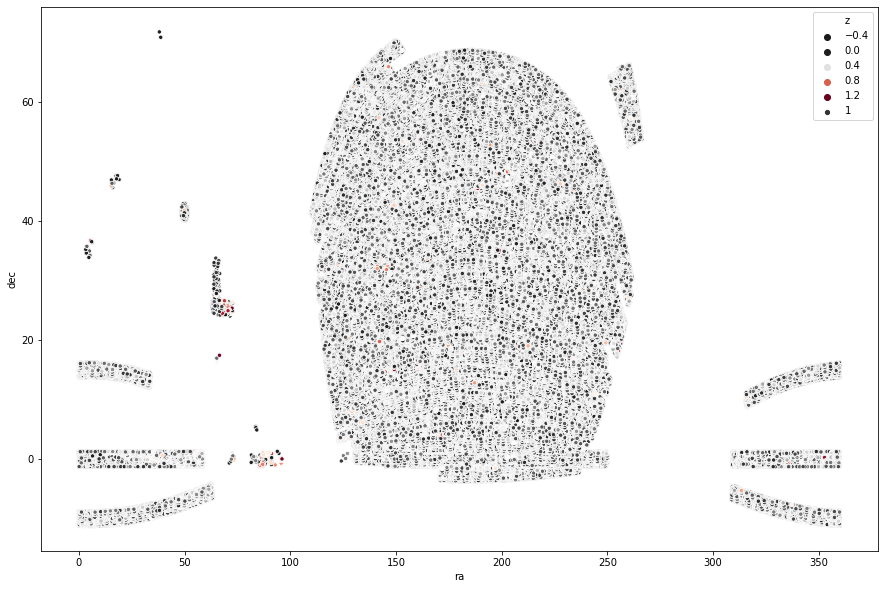

In [ ]:
## Grafico del total de datos.
f = plt.figure(figsize=(15,10))
sns.scatterplot(data=nuevo_data, x='ra', y='dec', hue='z', size=1, palette='RdGy_r')

2.2 Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.

In [ ]:
#rebanda=nuevo_data[nuevo_data.ra > 150][nuevo_data.ra < 200]
rebanada=nuevo_data[(nuevo_data.ra > 150) & (nuevo_data.ra < 200) & (nuevo_data.dec>60)]

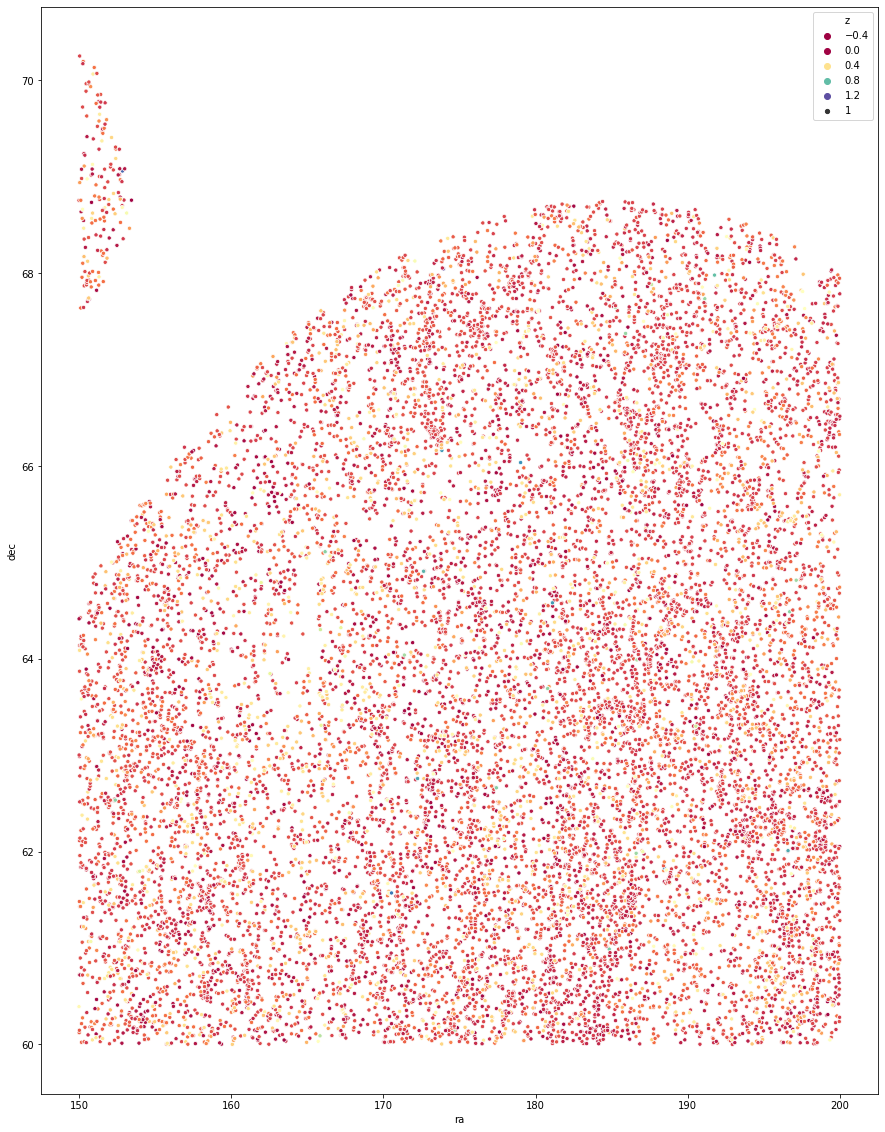

In [ ]:
plt.figure(figsize=(15,20)) #Gráfico de la rebanada
sns.scatterplot(data=rebanada, x='ra', y='dec', hue='z', size=1, palette='Spectral')

In [ ]:
rebanada.shape

(14808, 14)

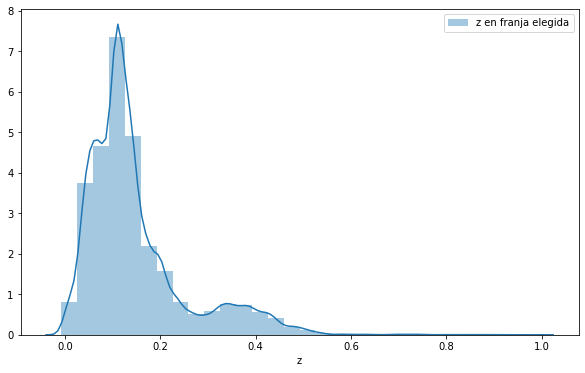

In [ ]:
plt.figure(figsize=(10,6)) #Gráfico de la densidad, distribución. 
n=30
sns.distplot(rebanada.z, kde=True, bins=n, label='z en franja elegida')
plt.legend()

2.5 Existe correlación entre las diferentes variables?

In [ ]:
#Calculamos los coeficientes de Correlación de Spearman, (Pearson solo se usa si hay distribucion normal) 
#y mostramos los resultados en una matriz. 
#Cuanto más cercano a +-1 es el valor, mayor correlación hay 
#y cuanto más cercano a cero el valor, menor correlación entre las variables hay
corr=nuevo_data.corr(method="spearman").round(2)
corr

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
z,1.00,0.64,-0.05,-0.04,0.78,0.77,0.62,0.55,0.50,0.73,0.77,0.63,0.57,0.51
velDisp,0.64,1.00,-0.01,0.03,0.55,0.40,0.17,0.10,0.03,0.51,0.41,0.19,0.11,0.04
ra,-0.05,-0.01,1.00,0.04,-0.05,-0.06,-0.07,-0.07,-0.07,-0.05,-0.06,-0.07,-0.07,-0.07
dec,-0.04,0.03,0.04,1.00,-0.11,-0.13,-0.14,-0.14,-0.14,-0.11,-0.13,-0.15,-0.14,-0.14
modelMag_u,0.78,0.55,-0.05,-0.11,1.00,0.93,0.79,0.73,0.66,0.96,0.93,0.80,0.73,0.66
modelMag_g,0.77,0.40,-0.06,-0.13,0.93,1.00,0.94,0.89,0.84,0.89,0.99,0.94,0.89,0.84
modelMag_r,0.62,0.17,-0.07,-0.14,0.79,0.94,1.00,0.99,0.97,0.75,0.92,0.99,0.98,0.95
modelMag_i,0.55,0.10,-0.07,-0.14,0.73,0.89,0.99,1.00,0.99,0.70,0.87,0.97,0.99,0.97
modelMag_z,0.50,0.03,-0.07,-0.14,0.66,0.84,0.97,0.99,1.00,0.64,0.82,0.95,0.97,0.98
petroMag_u,0.73,0.51,-0.05,-0.11,0.96,0.89,0.75,0.70,0.64,1.00,0.90,0.77,0.71,0.64


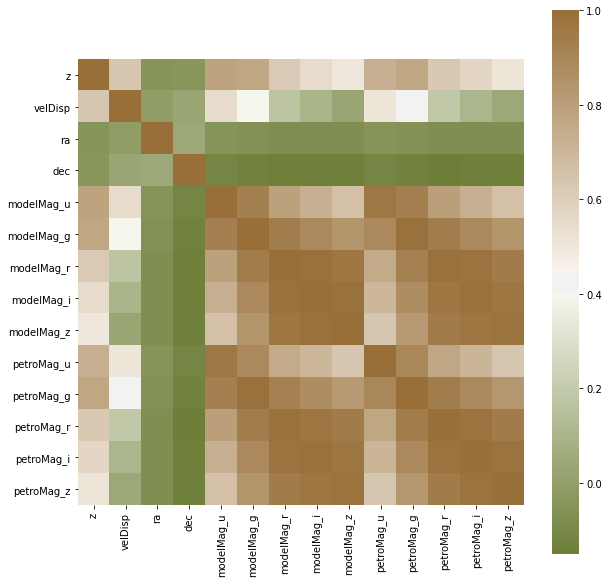

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,
            cmap=sns.diverging_palette(100, 50, as_cmap=True), #probar colores y s,l.
            square=True)

2.6 Realicen gráficos boxplot para identificar outliers. (Se podrian hacer subplot de todos los boxplots)

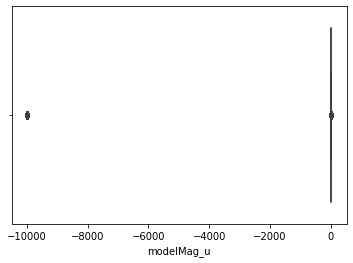

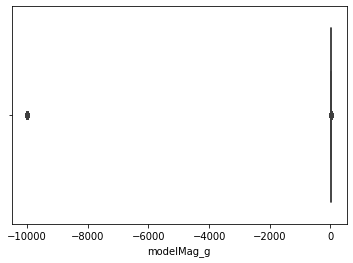

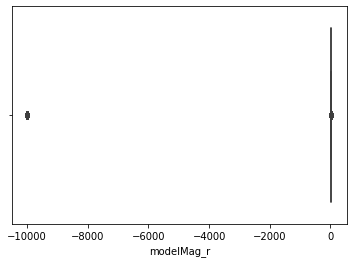

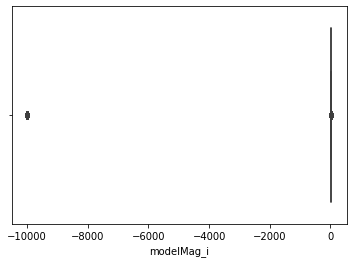

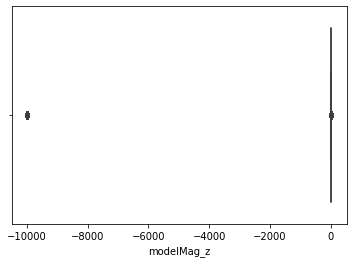

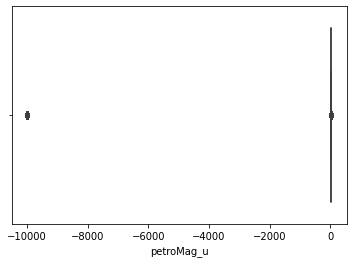

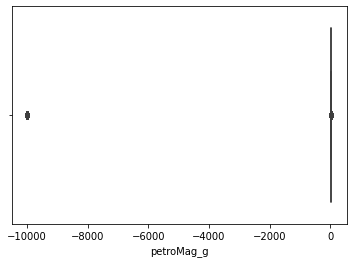

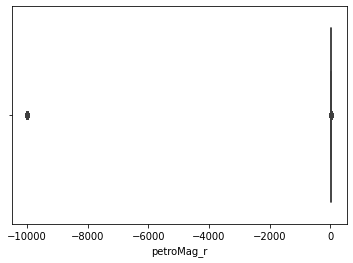

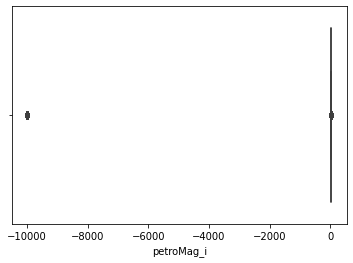

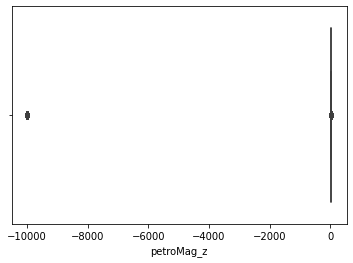

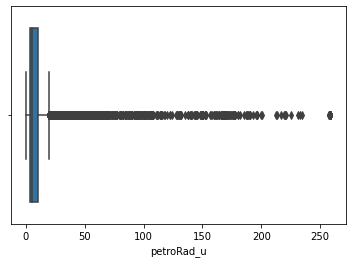

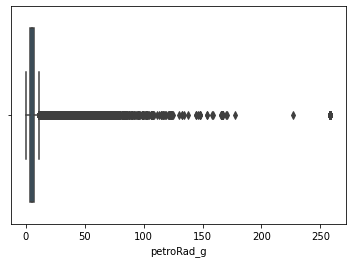

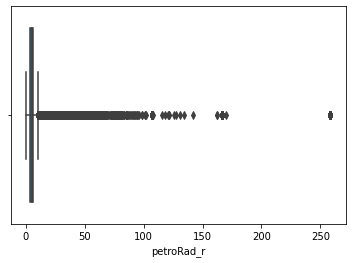

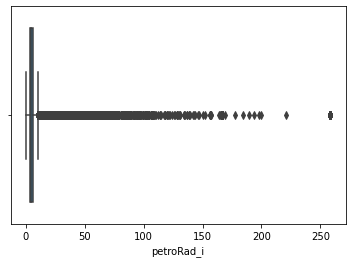

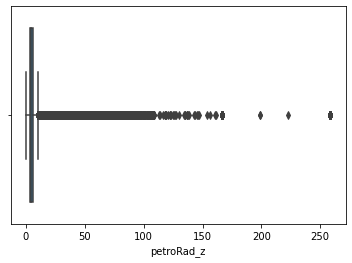

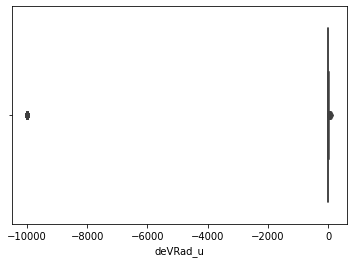

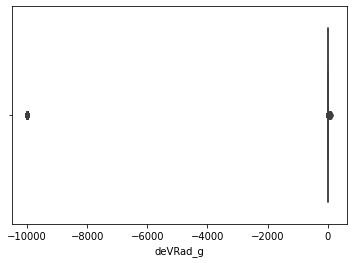

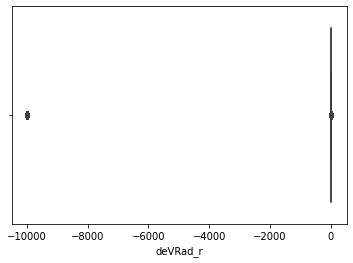

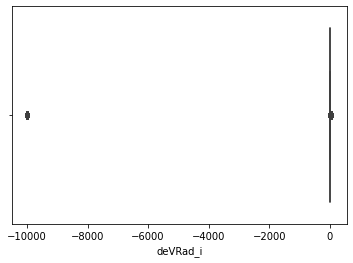

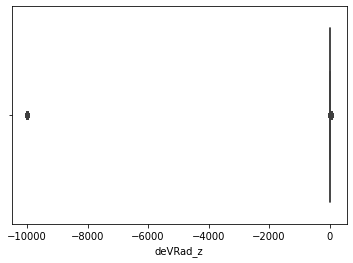

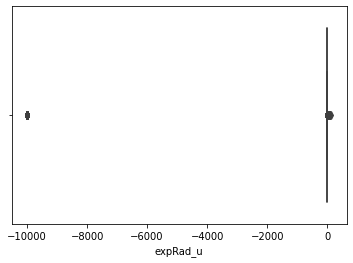

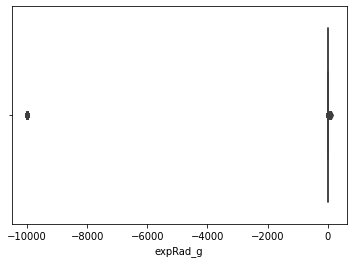

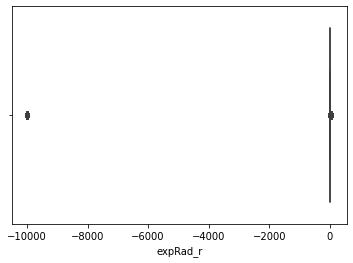

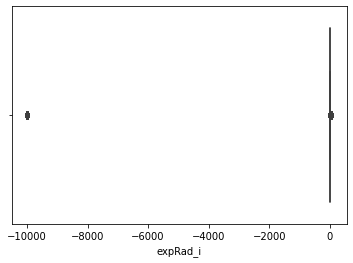

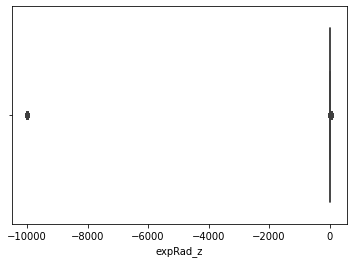

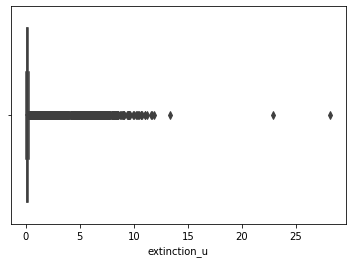

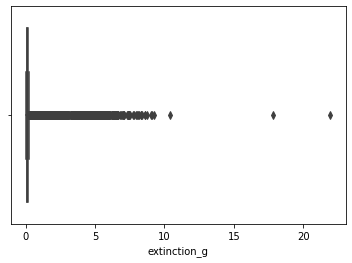

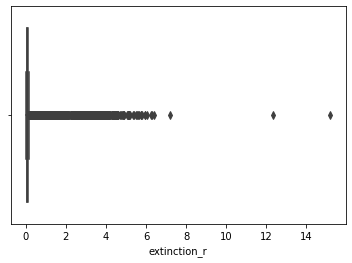

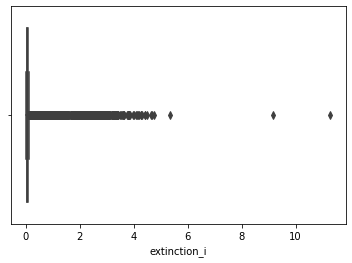

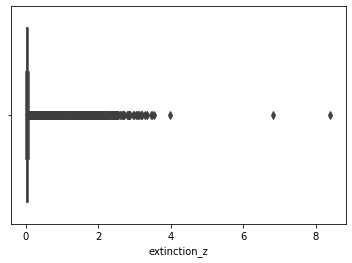

In [ ]:
for column in dd.columns:
    if 'Err' not in column:
        if ('Mag' in column) \
        or ('Rad' in column) \
        or ('extinction' in column):
            sns.boxplot(x=dd[column], data=dd)
            plt.show()

2.7 Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?

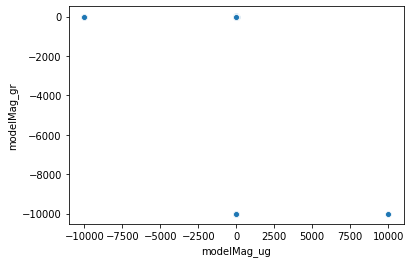

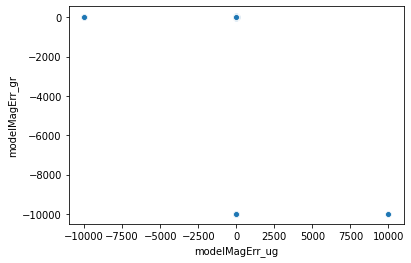

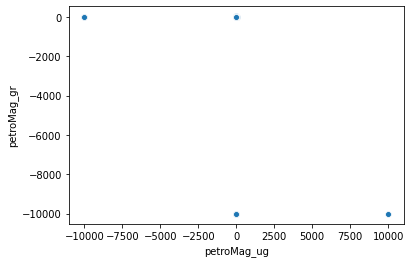

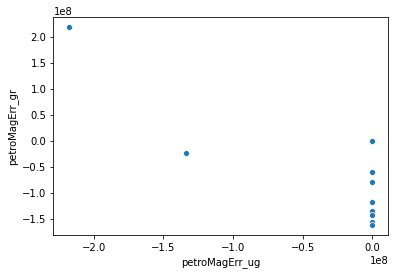

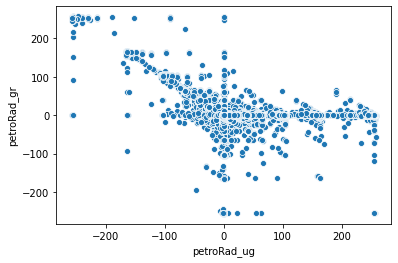

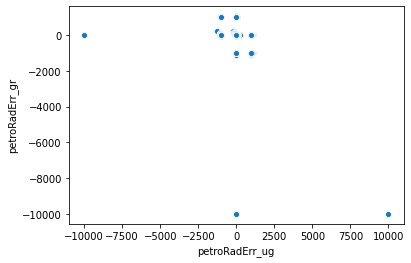

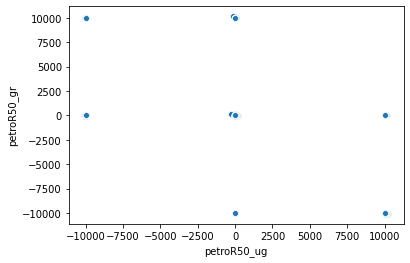

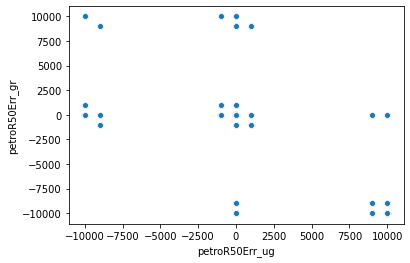

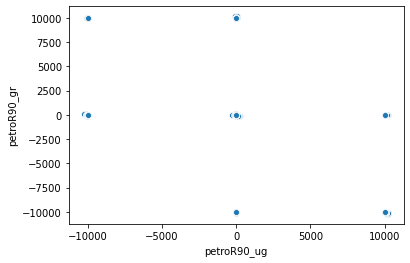

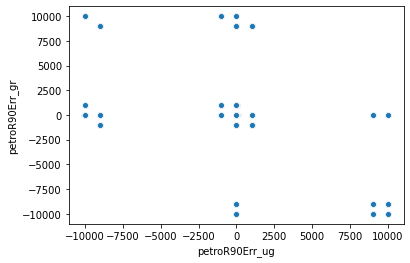

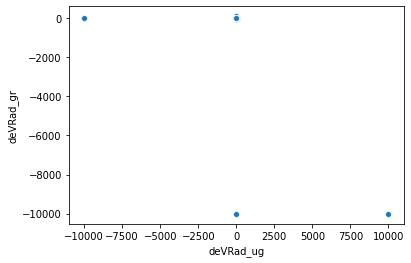

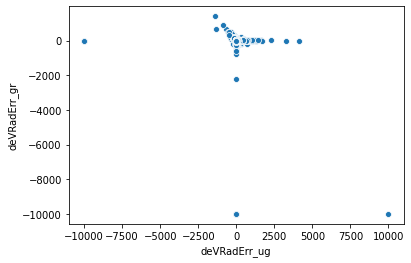

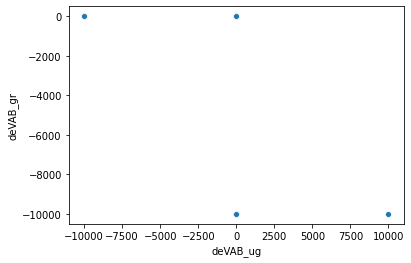

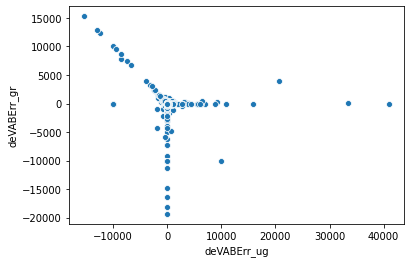

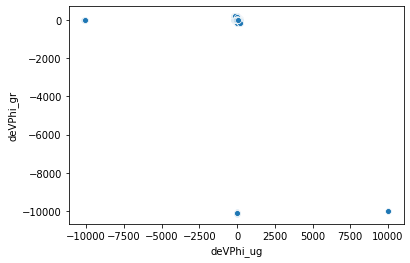

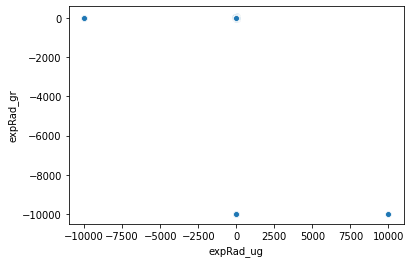

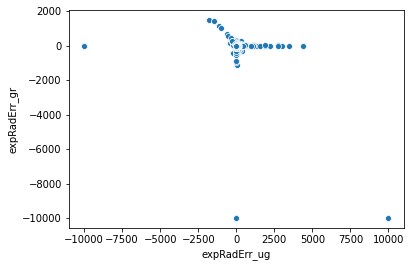

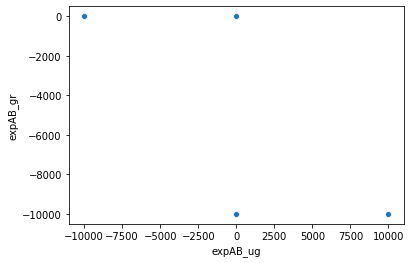

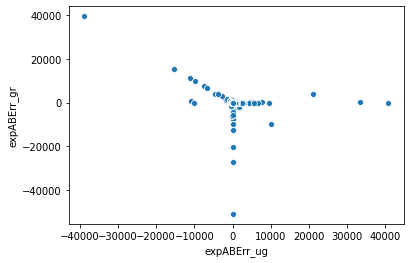

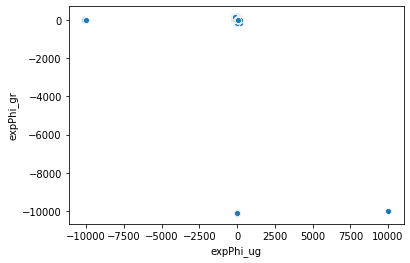

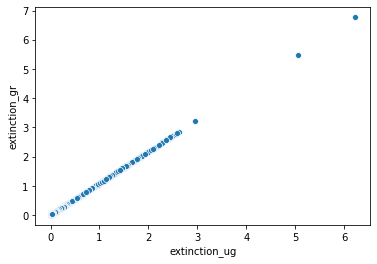

In [ ]:
for column in dd.columns:
    if '_g' in column:
        col_name= column.split('_')[0]
        ug= dd['{}_u'.format(col_name)] - dd[column]
        gr= dd[column] - dd['{}_r'.format(col_name)]
        
        sns.scatterplot(x= ug, y= gr).set(xlabel= col_name+'_ug' , ylabel=col_name+'_gr')
        plt.show()

2.9 Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

In [ ]:
is_S = dd['spiral'] == 1
is_E = dd['elliptical'] == 1
is_U = dd['uncertain'] == 1

In [ ]:
median_z_S = dd.z[is_S].median()
median_z_E = dd.z[is_E].median()
median_z_U = dd.z[is_U].median()
print("Mediana de z para las galaxias espirales: ", "{:.4f}".format(median_z_S) ,"\nMediana de z para las galaxias elípticas: ", "{:.4f}".format(median_z_E), "\nMediana para las galaxias irregulares: ", "{:.4f}".format(median_z_U))

In [ ]:
# El test estadístico para las medianas es el test de Mood cuya H0 indica que las medianas son iguales
from scipy import stats
stat, p_value, grand_m, table = stats.median_test(dd.z[is_S], dd.z[is_E], dd.z[is_U])
significance = [0.05, 0.01, 0.001]
for i in significance:
    if p_value < i:
        print("Las medianas son estadísticamente diferentes con un nivel de confianza de ", 100*(1-i), "%")